In [0]:
from platform import python_version
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,Concatenate,Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import random
import cv2
import os
from google.colab import drive
from scipy.io import loadmat
from scipy.spatial.distance import pdist,squareform
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
x_traindata=[]
root_path = "gdrive/My Drive/aip2020"
tpath=os.path.join(root_path,"train_datab/ground_truth")
ipath=os.path.join(root_path,"train_datab/images")
exten=['GT']
file_names = [fn for fn in os.listdir(tpath)
              if any(fn.startswith(ext) for ext in exten)]
j=0;
depthmap=[]
for f,i in zip(np.sort(file_names),np.sort(os.listdir(ipath))):
  
  matpath=os.path.join(tpath,f)
  depthimg=loadmat(matpath)['image_info']
  t=np.array(depthimg[0][0][0][0][0])
  print(i)
  img=cv2.imread(ipath+'/'+i,cv2.IMREAD_GRAYSCALE)
  im=np.array(img)/255
  # # plot
  # fig, ax = plt.subplots()
  # x = range(300)
  # ax.imshow(img)
  
  [m,n]=im.shape;
  t=np.floor(t/4)
  dist=pdist(t)
  depthimg=np.zeros([m,n])
  
  dist1=squareform(dist);
  dist1=np.sort(dist1);
  a=dist1[:,1:6]
  print(a.shape)
  sigma=np.sum(a,axis=1)/5
  m=int(m/4)
  n=int(n/4)
  depthimg=np.zeros([m,n])
  t[t[:,0]>n-1]=n-1;
  t[t[:,1]>m-1]=m-1;
  
  for i in range(len(sigma)):
    test=np.zeros([m,n])
    (k,l)=t[i,:]
    test[int(l),int(k)]+=1;
    ti=np.ceil(0.1*(sigma[i]))
    ksize=int(4*ti+1)
    test=cv2.GaussianBlur(test,(ksize,ksize),ti)
    depthimg+=test
  
  depthmap.append(depthimg)
  
  
  
  


IMG_1.jpg
(234, 5)
IMG_10.jpg
(230, 5)
IMG_100.jpg
(206, 5)
IMG_101.jpg
(83, 5)
IMG_102.jpg
(27, 5)
IMG_103.jpg
(151, 5)
IMG_104.jpg
(31, 5)
IMG_105.jpg
(130, 5)
IMG_106.jpg
(134, 5)
IMG_107.jpg
(117, 5)
IMG_108.jpg
(209, 5)
IMG_109.jpg
(90, 5)
IMG_11.jpg
(139, 5)
IMG_110.jpg
(31, 5)
IMG_111.jpg
(146, 5)
IMG_112.jpg
(92, 5)
IMG_113.jpg
(106, 5)
IMG_114.jpg
(88, 5)
IMG_115.jpg
(72, 5)
IMG_116.jpg
(168, 5)
IMG_117.jpg
(283, 5)
IMG_118.jpg
(59, 5)
IMG_119.jpg
(302, 5)
IMG_12.jpg
(100, 5)
IMG_120.jpg
(28, 5)
IMG_121.jpg
(42, 5)
IMG_122.jpg
(43, 5)
IMG_123.jpg
(155, 5)
IMG_124.jpg
(267, 5)
IMG_125.jpg
(28, 5)
IMG_126.jpg
(107, 5)
IMG_127.jpg
(53, 5)
IMG_128.jpg
(41, 5)
IMG_129.jpg
(146, 5)
IMG_13.jpg
(118, 5)
IMG_130.jpg
(50, 5)
IMG_131.jpg
(222, 5)
IMG_132.jpg
(118, 5)
IMG_133.jpg
(253, 5)
IMG_134.jpg
(152, 5)
IMG_135.jpg
(42, 5)
IMG_136.jpg
(174, 5)
IMG_137.jpg
(229, 5)
IMG_138.jpg
(104, 5)
IMG_139.jpg
(58, 5)
IMG_14.jpg
(50, 5)
IMG_140.jpg
(165, 5)
IMG_141.jpg
(151, 5)
IMG_142.jpg
(146, 

In [0]:
root_path = "gdrive/My Drive/aip2020/yfinal.npy"
newdata=np.array(depthmap)
np.save(root_path,newdata)

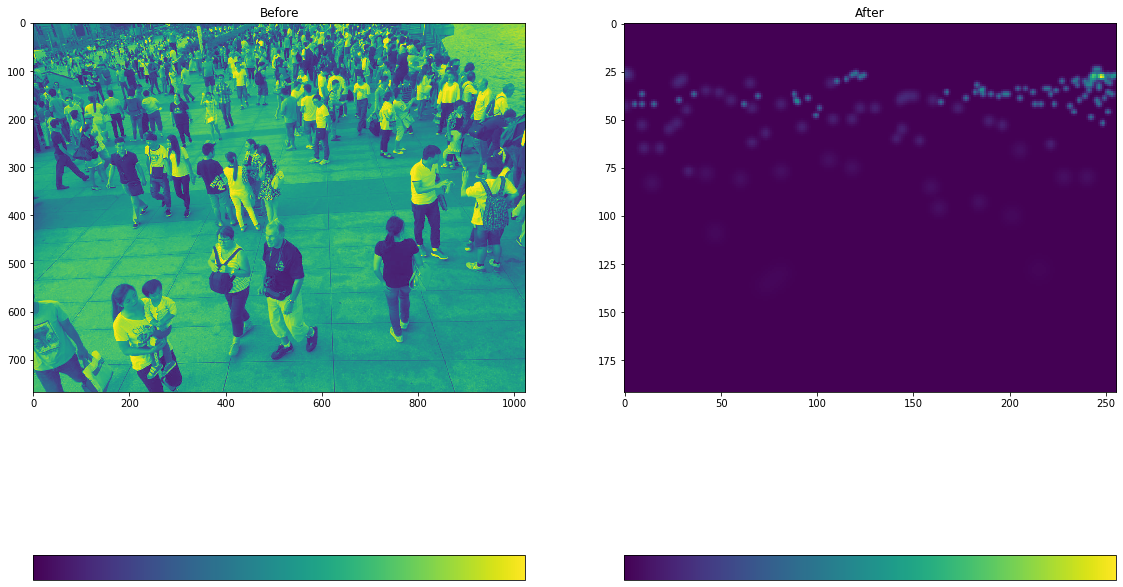

In [0]:
depthimg=newdata[320]
fig = plt.figure(figsize=[30, 20])
g = fig.add_subplot(1, 3, 1)
plt.imshow(img)
g.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
g = fig.add_subplot(1, 3, 2)
g.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

plt.imshow(depthimg)


IMG_1.jpg


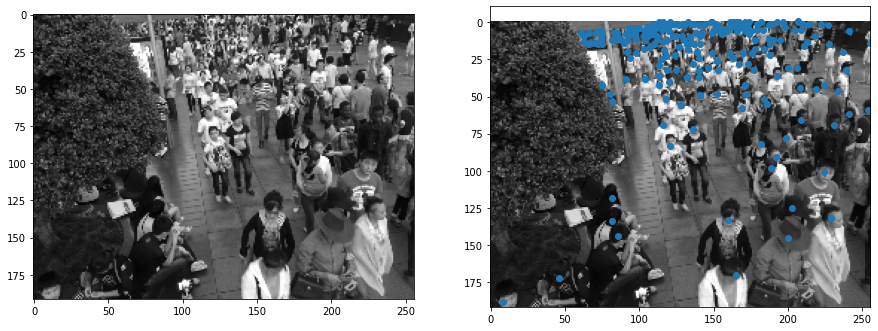

In [0]:
x_traindata=[]
root_path = "gdrive/My Drive/aip2020"
tpath=os.path.join(root_path,"train_datab/ground_truth")
ipath=os.path.join(root_path,"train_datab/images")
exten=['GT']
file_names = [fn for fn in os.listdir(tpath)
              if any(fn.startswith(ext) for ext in exten)]
j=0;
depthmap=[]
for f,i in zip(np.sort(file_names),np.sort(os.listdir(ipath))):
  
  matpath=os.path.join(tpath,f)
  depthimg=loadmat(matpath)['image_info']
  t=np.array(depthimg[0][0][0][0][0])
  print(i)
  img=cv2.imread(ipath+'/'+i,cv2.IMREAD_GRAYSCALE)
  im=np.array(img)/255
  
  # # plot
  # fig, ax = plt.subplots()
  # x = range(300)
  # ax.imshow(img)
  
  [m,n]=im.shape;
  t=np.floor(t/4)
  dist=pdist(t)
  depthimg=np.zeros([m,n])
  
  
  
  
  m=int(m/4)
  n=int(n/4)
  img=cv2.resize(img,(n,m))
  depthimg=np.zeros([m,n])
  t[t[:,0]>n-1]=n-1;
  t[t[:,1]>m-1]=m-1;
  plt.figure(figsize=[15,30])
  
  ax=plt.subplot(1,2,1)
  ax=plt.imshow(img,cmap='gray')
  
  ax=plt.subplot(1,2,2)
  ax=plt.imshow(img,cmap='gray')
  ax=plt.scatter(t[:,0],t[:,1])
  plt.savefig('depth.png')
  break
  
  # depthmap.append(depthimg)
  
  
  
  
